<a href="https://colab.research.google.com/github/Abhinayy27/ML-Models/blob/main/sports_car_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
path = '/content/drive/MyDrive/ML/Sport car price.csv'
df= pd.read_csv(path)

In [ ]:
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [ ]:
df.dtypes

Car Make                   object
Car Model                  object
Year                        int64
Engine Size (L)            object
Horsepower                 object
Torque (lb-ft)             object
0-60 MPH Time (seconds)    object
Price (in USD)             object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['Car Make'] = le.fit_transform(df['Car Make'])

In [ ]:
df.drop(columns = 'Car Model', axis=1, inplace=True)

In [ ]:
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',','')
df['Price (in USD)'] = df['Price (in USD)'].astype(int)

In [ ]:
df['Engine Size (L)'] = pd.to_numeric(df['Engine Size (L)'], errors= 'coerce')
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors= 'coerce')
df['Torque (lb-ft)'] = pd.to_numeric(df['Torque (lb-ft)'], errors= 'coerce')
df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'], errors= 'coerce')

In [ ]:
df.head()

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,28,2022,3.0,379.0,331.0,4.0,101200
1,16,2021,5.2,630.0,443.0,2.8,274390
2,11,2022,3.9,661.0,561.0,3.0,333750
3,5,2022,5.2,562.0,406.0,3.2,142700
4,21,2021,4.0,710.0,568.0,2.7,298000


In [ ]:
df.fillna(df .mean(skipna = True), inplace =True)

In [ ]:
df.isnull().sum()

Car Make                   0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

In [ ]:
import datetime
yr= datetime.datetime.now().year

In [ ]:
df['Age']= yr - df['Year']

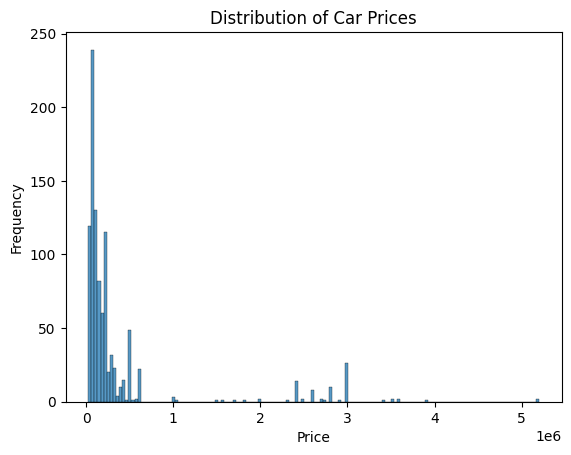

In [ ]:
sns.histplot(data=df, x='Price (in USD)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()

In [ ]:
numeric_cols = ['Year', 'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)', 'Age']

In [ ]:
corr_mat = df[numeric_cols].corr()

<Axes: >

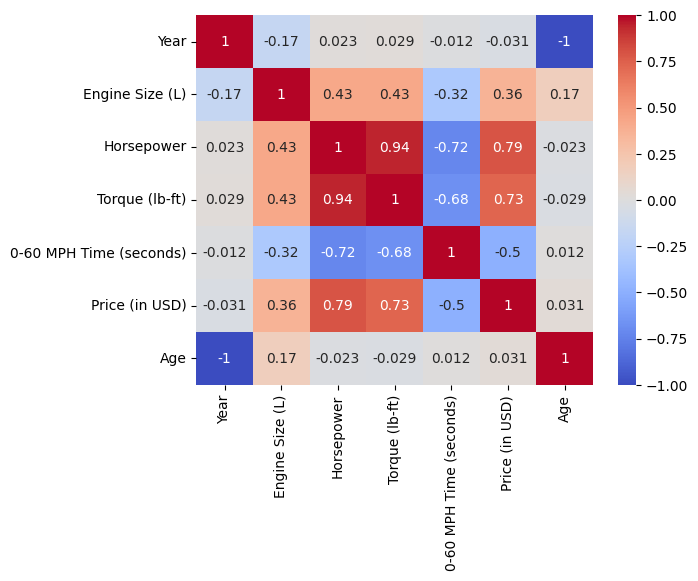

In [ ]:
sns.heatmap(corr_mat, annot= True, cmap= 'coolwarm')

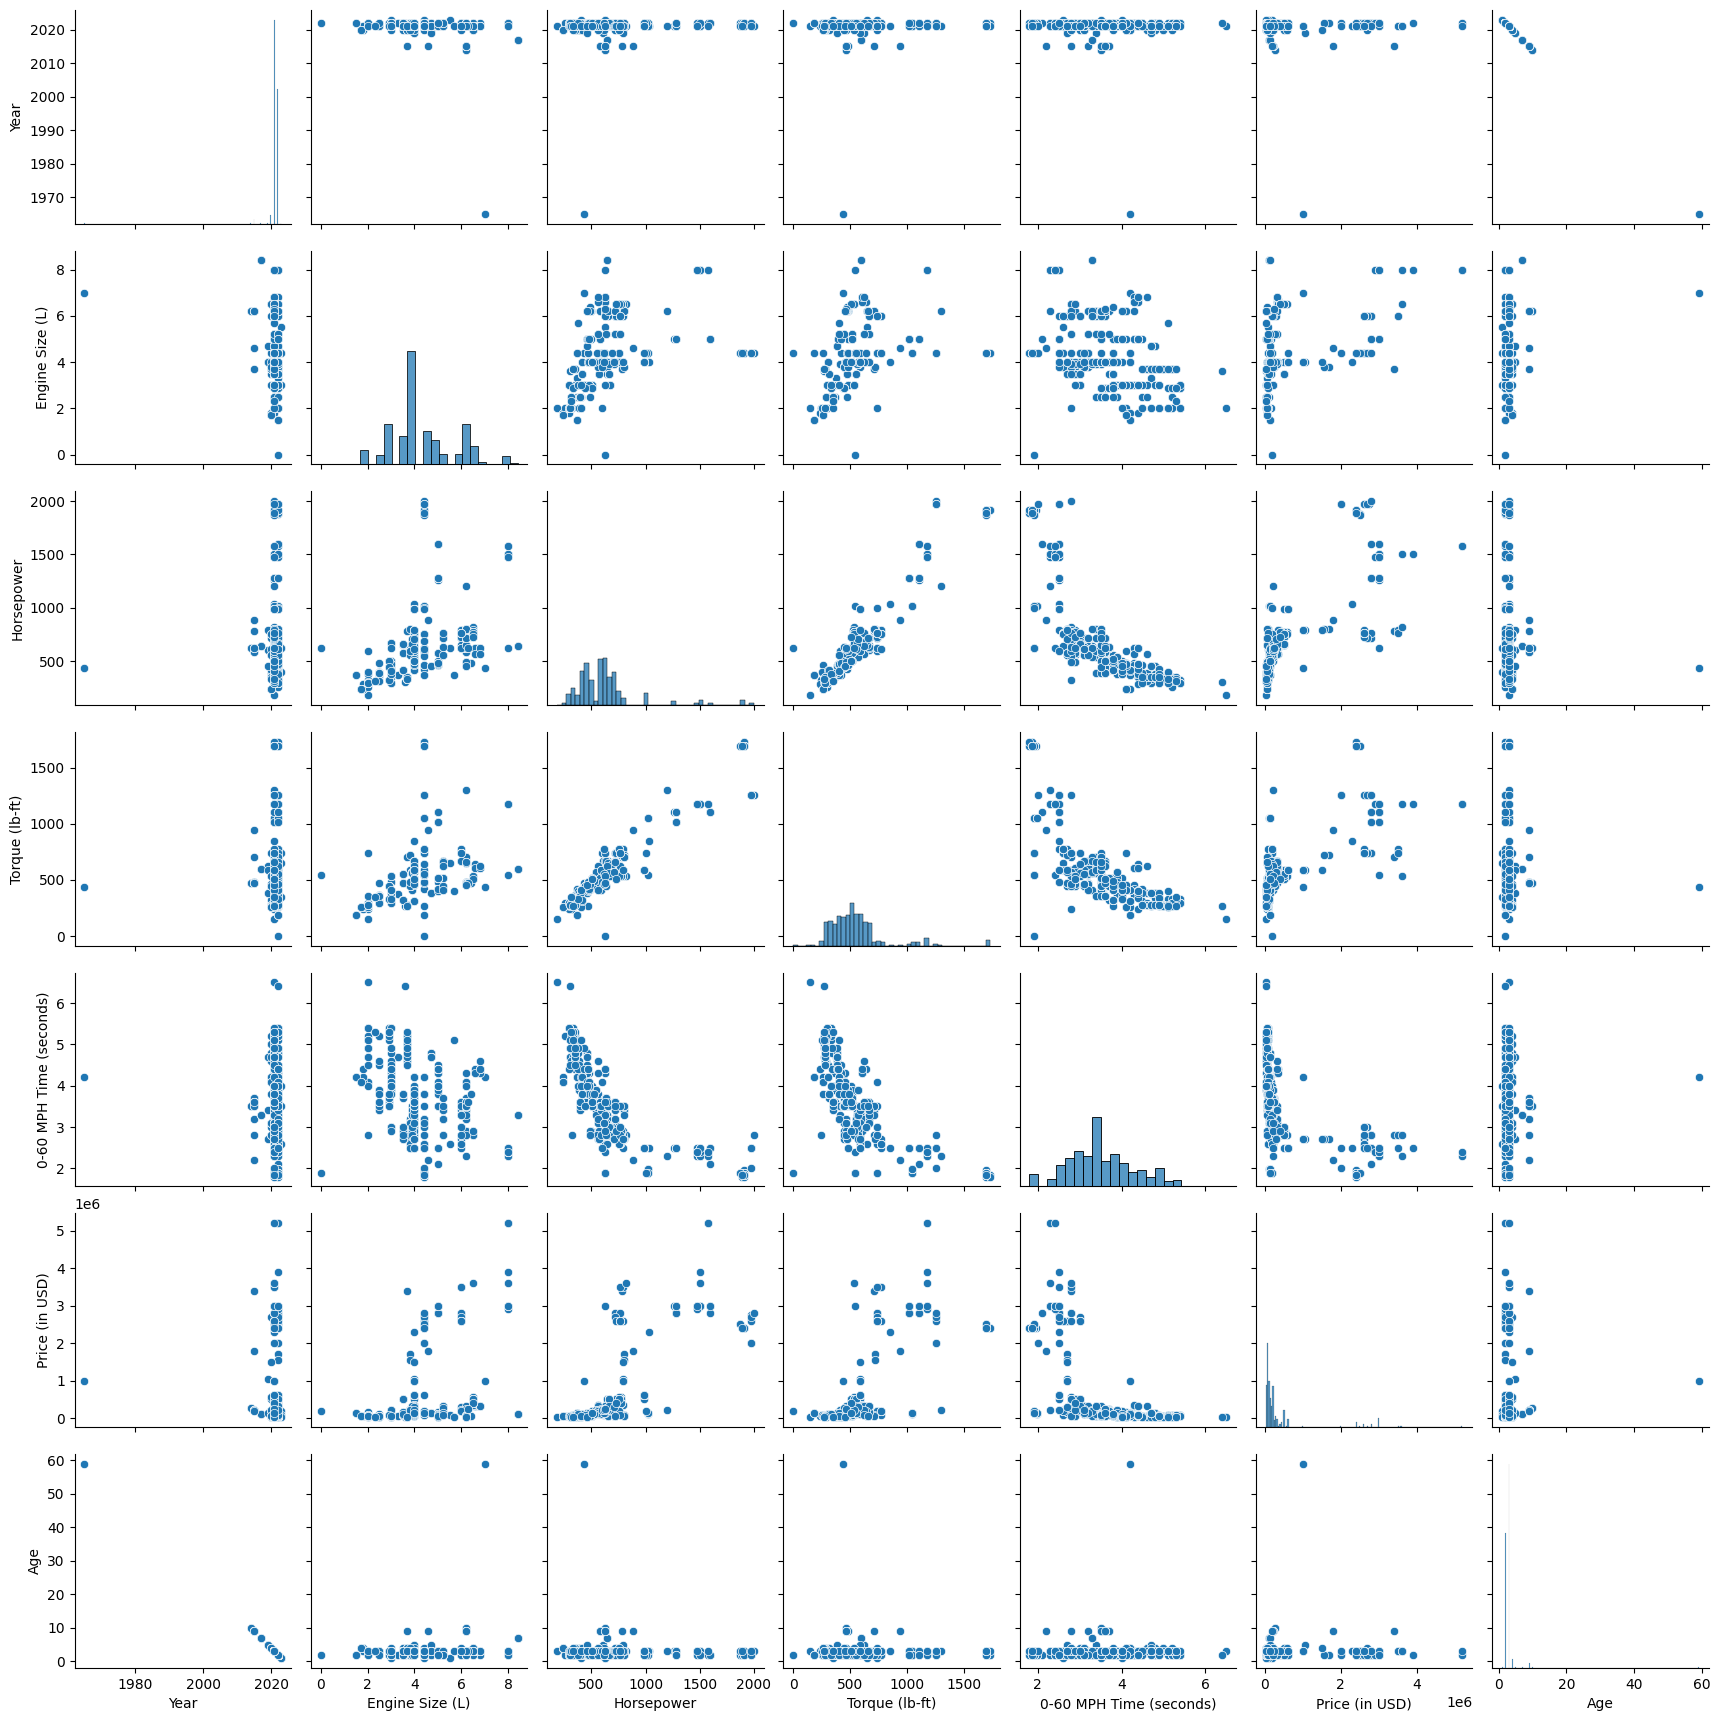

In [ ]:
sns.pairplot(df[numeric_cols])

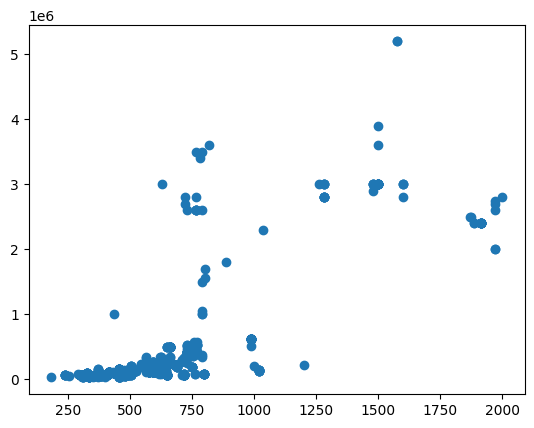

In [ ]:
plt.scatter(df['Horsepower'], df['Price (in USD)'])

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = 'Price (in USD)',  axis =1 )
X = df.drop(columns = 'Year', axis =1)

In [ ]:
y = df['Price (in USD)']

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 51)

Linear Regression Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
pred = model.predict(X_test)
r2 = r2_score(y_test, pred)
print(f"R-squared: {r2}")

R-squared: 1.0


Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train,y_train)
tree_pred = tree_model.predict(X_test)
r2 = r2_score(y_test, tree_pred)
print(f"R_squared: {r2}")

R_squared: 0.9961148142162968


In [ ]:
X = df[['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Age']]
y = df['Price (in USD)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# Create an instance of the Decision Tree Regressor
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9658562620383565
